# Clustering the Countries by using Unsupervised Learning

*The dataset for this project originates from the [Unsupervised Learning on Country Data](https://www.kaggle.com/rohan0301/unsupervised-learning-on-country-data)*
<br>


# Objective:
To categorise the countries using socio-economic and health factors that determine the overall development of the country.

# Problem Statement:

- HELP International have been able to raise around $10 million. Now the CEO of HELP International NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. 
- Our job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.


# Attribute Information

The data is contains values of different features are from different sources. The objective to suggest the countries which needs help of the money.

### Variables

1. **country :** Name of the country
2. **child_mort :** Death of children under 5 years of age per 1000 live births
3. **exports :** Exports of goods and services per capita. Given as percentage of the GDP per capita
4. **health :** Total health spending per capita. Given as percentage of GDP per capita
5. **imports :** Imports of goods and services per capita. Given as percentage of the GDP per capita
6. **Income :** Net income per person
7. **Inflation :** The measurement of the annual growth rate of the Total GDP
8. **life_expec :** The average number of years a new born child would live if the current mortality patterns are to remain the same
9. **total_fer :** The number of children that would be born to each woman if the current age-fertility rates remain the same
10. **gdpp :** The GDP per capita. Calculated as the Total GDP divided by the total population.

<a id= 'toc'></a>
# Table of Contents
1. **[Load Dependencies](#import_packages)**
2. **[Load dataset](#load_data)**
3. **[Data Types and Dimensions](#data_types)**
4. **[Data Preprocessing](#data_preprocessing)**
    - 4.1 - **[Data Cleaning](#data_cleaning)**
    - 4.2 - **[Exploratory Data Analysis](#eda)**
        - 4.2.1 - **[Data Visualization](#visulization)**
        - 4.2.2 - **[Analysis report](#report)**
    - 4.3 - **[Feature Scaling](scaling)**
5. **[Model Development](model)**
6. **[Conclusion](overview)**

<a id = 'import_packages'></a>
# 1. Load Dependencies

[goto toc](#toc)

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
# Pretty display for notebooks
%matplotlib inline
import seaborn as sns
# Set default setting of seaborn
sns.set()

<a id = 'load_data'></a>
# 2. Load Dataset

Read data from NGO-Country-data.csv file using pandas method read_csv().

[goto toc](#toc)

In [2]:
# Read the data
df = pd.read_csv('NGO-Country-data.csv')

# print the first five rows of the data
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


<a id = 'data_types'></a>
# 3. Data Types and Dimensions

[goto toc](#toc)

In [3]:
print("Unsupervised Learning on Country Data contains total \033[4m\033[1m{}\033[0m\033[0m data points with \033[4m\033[1m{}\033[0m\033[0m  features".format(*df.shape))

Unsupervised Learning on Country Data contains total 167 data points with 10  features


In [4]:
# check the data types of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


<a id = 'data_preprocessing'></a>
# 4. Data Preprocessing

*Data Preprocessing is data mining technique which is used to convert raw data in a useful and efficient format.*

[goto toc](#toc)

<a id = 'data_cleaning'></a>
# 4.1 Data Cleaning

*Data clearning refers to preparing data for analysis by removing or modifying data that is incomplete, unuseful, duplicate, or incorrectly formatted.*

[goto toc](#toc)

## Missing Data
*Finding missing values and filling supporitve value in place of missing values. If the missing values are not handled it can lead to raw and inaccurate dataset, due to improper handeling, the result obtained will different for what it should be.*

In [5]:
def missing_data(data):
    
    #creating Dataframe
    df = pd.DataFrame()
    
    #Get list of all columns
    df['Feature'] = data.columns.values
    
    # Get list of sum of null values for each feature
    df['Count'] = data.isnull().sum().values
    
    # Calculate percentage of missing values
    df['Percentage'] = (data.isnull().mean() *100).values
    return df

In [6]:
missing_data(df)

,Feature,Count,Percentage
0,country,0,0.0
1,child_mort,0,0.0
2,exports,0,0.0
3,health,0,0.0
4,imports,0,0.0
5,income,0,0.0
6,inflation,0,0.0
7,life_expec,0,0.0
8,total_fer,0,0.0
9,gdpp,0,0.0


**Note : we can observe that there is no null values in dataset**

## Check for duplication

In [7]:
df.duplicated().sum()

0

**Note: There are no duplicate values in the dataset**

In [8]:
no_missing = df.copy(deep = True)

<a id= 'eda'></a>
# 4.2. Exploratory Data Analysis

*The preliminary analysis of data to discover relationships between measures in the data and to gain an insight on the trends, patterns, and relationships among various entities present in the data set with the help of statistics and visualization tools is called Exploratory Data Analysis (EDA).*

[goto toc](#toc)

<a id= 'visulization'></a>
### 4.2.1 Data Visualization

[goto toc](#toc)

In [9]:
#Get statictical discription
no_missing.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


<a id='country_level'></a>
### 4.2.1. Country Level Analysis

*We will going to consider 15 countries for every feature of dataset*

[goto toc](#toc)

**Let's look at child_mort by each Country**

In [10]:
# Create the dataframe to store country and its Child mortality
high_child_mort_country = pd.DataFrame(columns = ['Country', "Child_mort"])

# Variable to store count of indexs
index = 0

for i in no_missing["country"].unique().tolist():
    
    high_child_mort_country.loc[index, "Country"] = i
    
    high_child_mort_country.loc[index, "Child_mort"] = no_missing[no_missing["country"] == i]["child_mort"].sum()
    
    index +=1

# Get 15 High Child_mort by country
top_15_highest_child_mort = high_child_mort_country.groupby(["Country"]).sum().sort_values("Child_mort",ascending=False).head(15)
top_15_highest_child_mort

,Child_mort
Country,
Haiti,208.0
Sierra Leone,160.0
Chad,150.0
Central African Republic,149.0
Mali,137.0
Nigeria,130.0
Niger,123.0
Angola,119.0
Burkina Faso,116.0


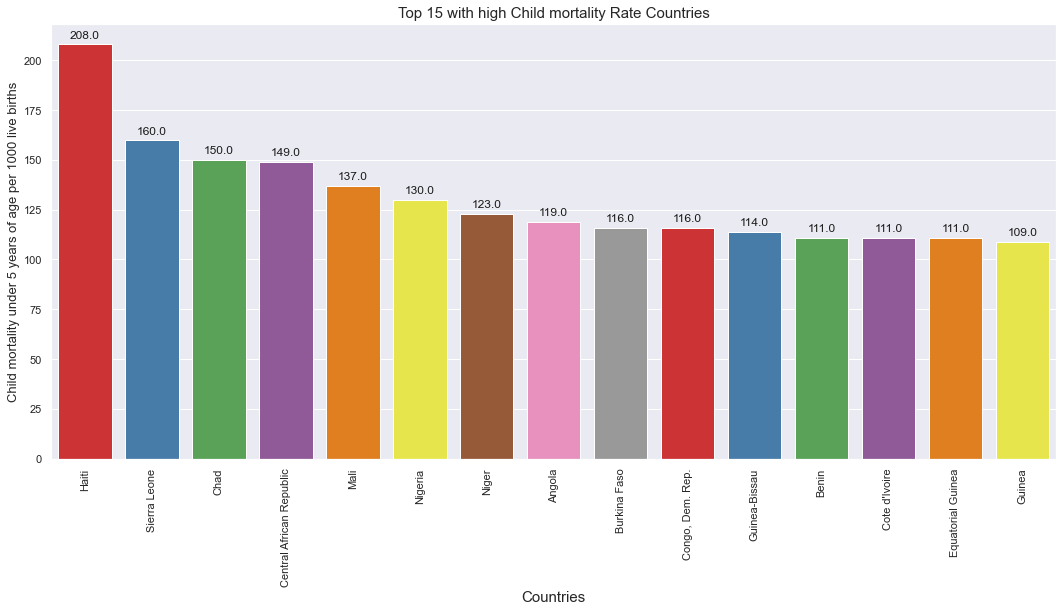

In [11]:
# Plot a figure
plt.figure(figsize=(18,8))


# Plot barplot
sns.barplot(x = top_15_highest_child_mort.index.values.tolist(), y = top_15_highest_child_mort['Child_mort'].values.tolist(), palette='Set1')
 

for i in range(15):
    text = f"{top_15_highest_child_mort['Child_mort'][i]}"
    plt.text(i, top_15_highest_child_mort['Child_mort'][i] + 3, text, fontsize=12, color='k', horizontalalignment='center')


#plt.tight_layout(w_pad = 0, h_pad = 5)

# rotate xlabels
plt.xticks(rotation=90)

# Add title to the figure
plt.title('Top 15 with high Child mortality Rate Countries', fontsize = 15)

# X labels to the figure
plt.xlabel('Countries', fontsize = 15)

# Y label to the figure
plt.ylabel('Child mortality under 5 years of age per 1000 live births', fontsize = 13)

# Show the plot
plt.show()

**Observation**
- There is high child mortality in **Haiti (208)**, where as low in **Guinea (109)** with top 15 high child mortality rate.

**Let's look at exports by country**

In [12]:
# Create the dataframe to store country and its Exports
less_export_country = pd.DataFrame(columns = ['Country', "Exports"])

# Variable to store count of indexs
index = 0

for i in no_missing["country"].unique().tolist():
    
    less_export_country.loc[index, "Country"] = i
    
    less_export_country.loc[index, "Exports"] = no_missing[no_missing["country"] == i]["exports"].sum()
    
    index +=1

# Get 15 Less Export country's
less_export_country = less_export_country.groupby(["Country"]).sum().sort_values("Exports",ascending=False).tail(15)
less_export_country

,Exports
Country,
Guinea-Bissau,14.900
Tajikistan,14.900
Pakistan,13.500
Kiribati,13.300
Tonga,12.400
United States,12.400
Rwanda,12.000
Central African Republic,11.800
Brazil,10.700


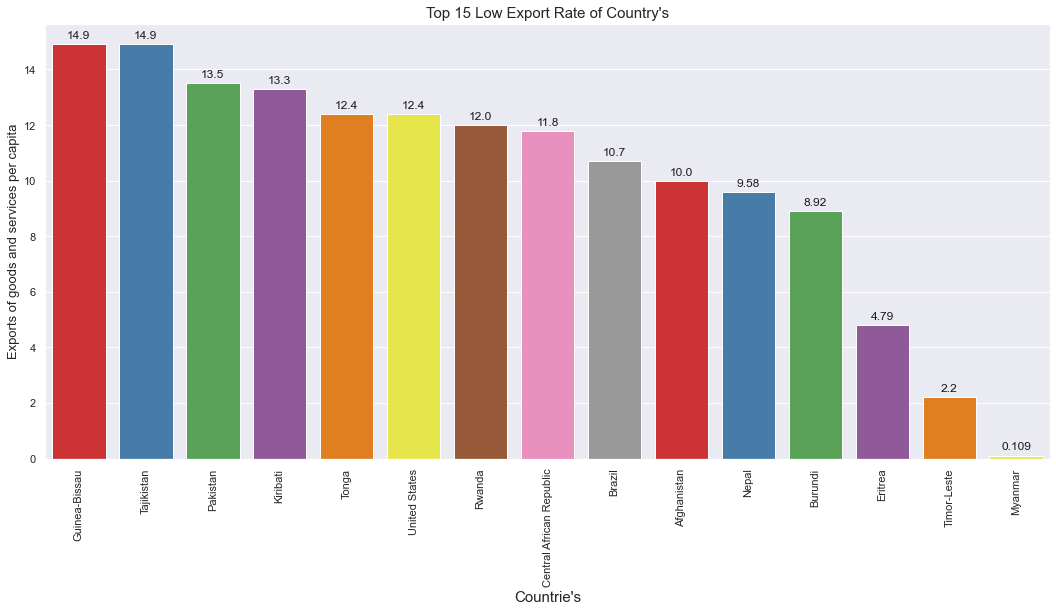

In [13]:
# Plot a figure
plt.figure(figsize=(18,8))


# Plot barplot
sns.barplot(x = less_export_country.index.values.tolist(), y = less_export_country['Exports'].values.tolist(), palette='Set1')
 

for i in range(15):
    text = f"{less_export_country['Exports'][i]}"
    plt.text(i, less_export_country['Exports'][i] + 0.2, text, fontsize=12, color='k', horizontalalignment='center')


#plt.tight_layout(w_pad = 0, h_pad = 5)

# rotate xlabels
plt.xticks(rotation=90)

# Add title to the figure
plt.title("Top 15 Low Export Rate of Country's", fontsize = 15)

# X labels to the figure
plt.xlabel("Countrie's", fontsize = 15)

# Y label to the figure
plt.ylabel('Exports of goods and services per capita', fontsize = 13)

# Show the plot
plt.show()

**Observation**
-  Counrty such as **Timor-Leste, Myanmar** should focus more towards export of there goods, which can increase there gdp of country.

**Let's look at Health Rate Distribution by Country**

In [14]:
# Create the dataframe to store country and its Health
less_health_country = pd.DataFrame(columns = ['Country', "Health"])

# Variable to store count of indexs
index = 0

for i in no_missing["country"].unique().tolist():
    
    less_health_country.loc[index, "Country"] = i
    
    less_health_country.loc[index, "Health"] = no_missing[no_missing["country"] == i]["health"].sum()
    
    index +=1

# Get 15 Less Export country's
less_health_country = less_health_country.groupby(["Country"]).sum().sort_values("Health",ascending=False).tail(15)
less_health_country

,Health
Country,
Bangladesh,3.52
Gabon,3.50
Seychelles,3.40
Sri Lanka,2.94
Angola,2.85
Brunei,2.84
Oman,2.77
Eritrea,2.66
Kuwait,2.63


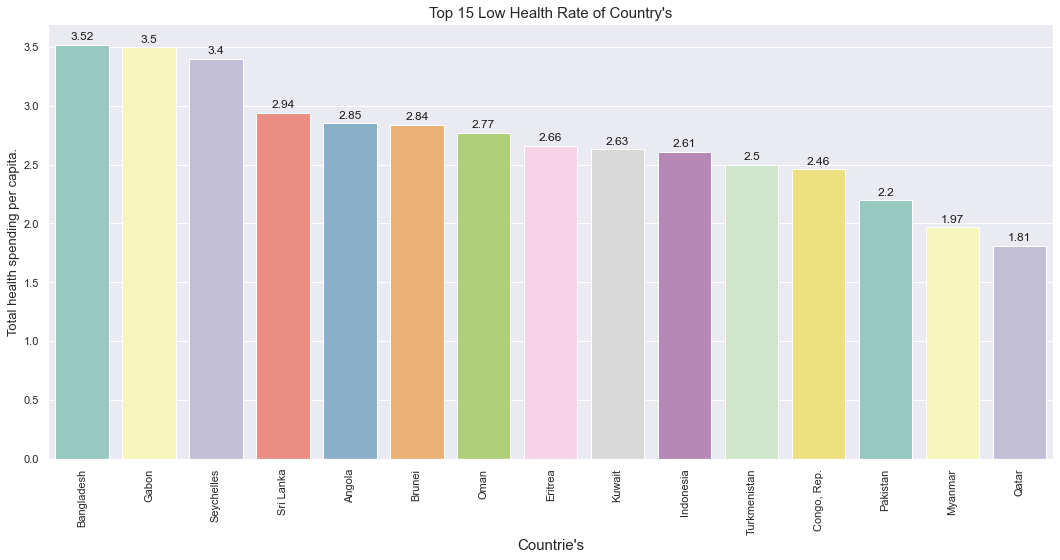

In [15]:
# Plot a figure
plt.figure(figsize=(18,8))


# Plot barplot
sns.barplot(x = less_health_country.index.values.tolist(), y = less_health_country['Health'].values.tolist(), palette='Set3')
 

for i in range(15):
    text = f"{less_health_country['Health'][i]}"
    plt.text(i, less_health_country['Health'][i] + 0.04, text, fontsize=12, color='k', horizontalalignment='center')


#plt.tight_layout(w_pad = 0, h_pad = 5)

# rotate xlabels
plt.xticks(rotation=90)

# Add title to the figure
plt.title("Top 15 Low Health Rate of Country's", fontsize = 15)

# X labels to the figure
plt.xlabel("Countrie's", fontsize = 15)

# Y label to the figure
plt.ylabel('Total health spending per capita.', fontsize = 13)

# Show the plot
plt.show()

**Observation**
- As compare to **Bangladesh with 3.52%**, **Quatar** spends **1.81%** amount on there health care per capital which is lowest as copare to all the other countries.

**Let's look at Net Income Distribution by Country**

In [16]:
# Create the dataframe to store country and its Income
less_income_country = pd.DataFrame(columns = ['Country', "Income"])

# Variable to store count of indexs
index = 0

for i in no_missing["country"].unique().tolist():
    
    less_income_country.loc[index, "Country"] = i
    
    less_income_country.loc[index, "Income"] = no_missing[no_missing["country"] == i]["income"].sum()
    
    index +=1

# Get 15 Less Export country's
less_income_country = less_income_country.groupby(["Country"]).sum().sort_values("Income",ascending=False)
less_income_country

,Income
Country,
Qatar,125000
Luxembourg,91700
Brunei,80600
Kuwait,75200
Singapore,72100
...,...
Central African Republic,888
Niger,814
Burundi,764


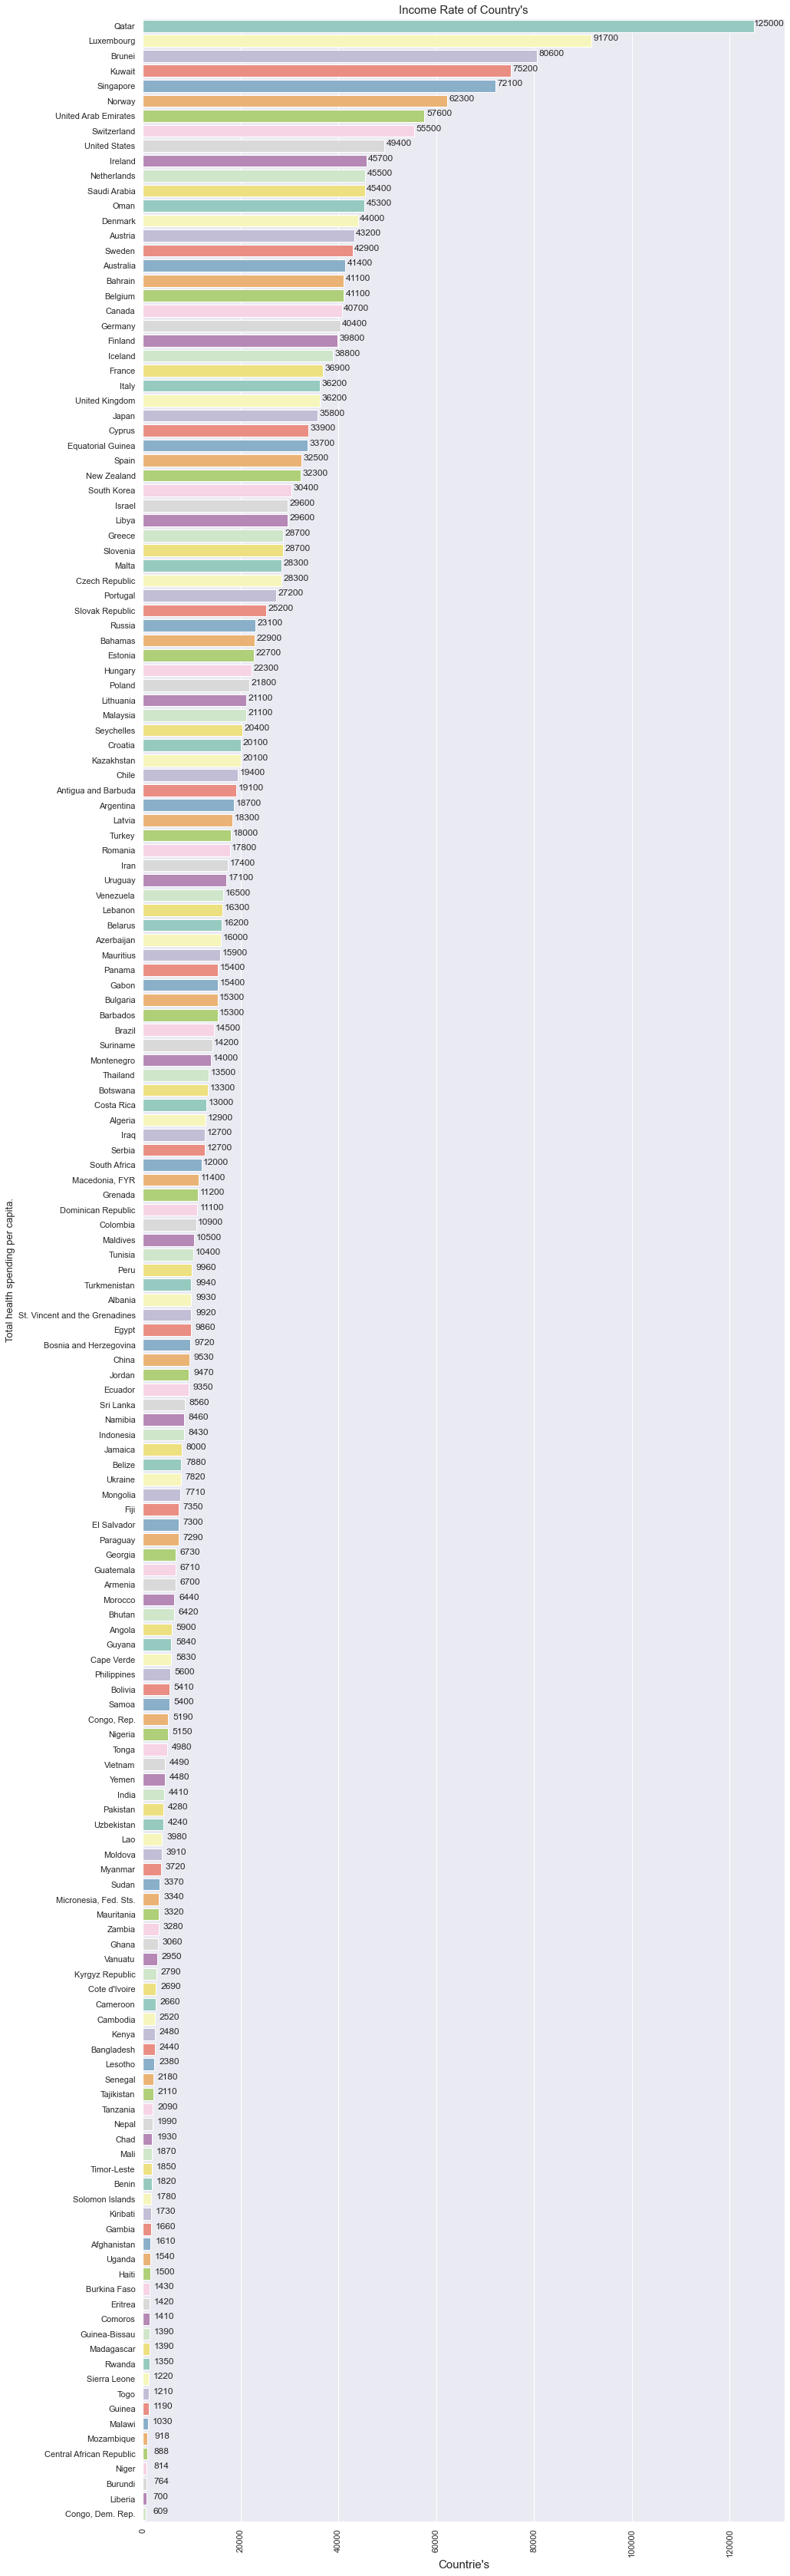

In [17]:
# Plot a figure
plt.figure(figsize=(15,60))


# Plot barplot
sns.barplot(y = less_income_country.index.values.tolist(), x = less_income_country['Income'].values.tolist(), palette='Set3')
 

for i in range(len(less_income_country['Income'])):
    text = f"{less_income_country['Income'][i]}"
    plt.text(less_income_country['Income'][i] + 3000 , i, text, fontsize=12,  horizontalalignment='center')


#plt.tight_layout(w_pad = 0, h_pad = 5)

# rotate xlabels
plt.xticks(rotation=90)

# Add title to the figure
plt.title("Income Rate of Country's", fontsize = 15)

# X labels to the figure
plt.xlabel("Countrie's", fontsize = 15)

# Y label to the figure
plt.ylabel('Total health spending per capita.', fontsize = 13)

# Show the plot
plt.show()

**Observation :**

- **Qatar** generates the higherst Net Income rate of about **125000**.
- Lowest Net Income rate from **Congo Dem. Rep of 609**.
- While Superpower Country **USA** gentrates of **49400** stands as **6th position** according to data
- **4410 Net Income rate is of INDIA**

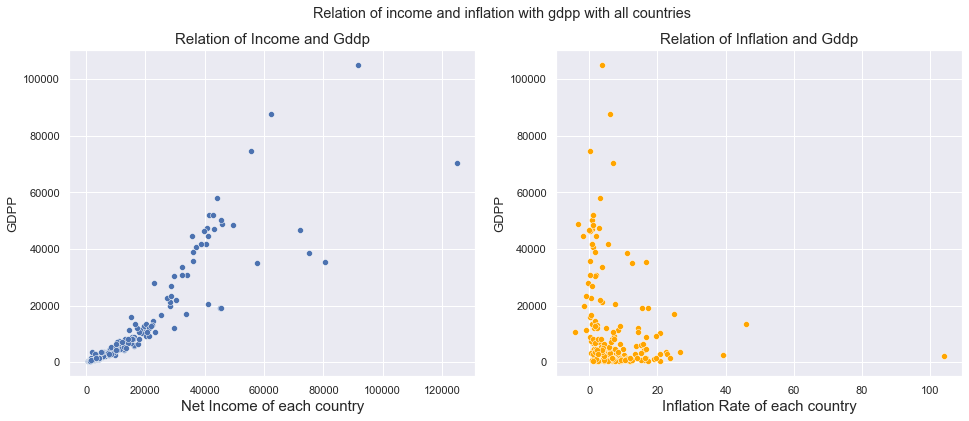

In [18]:
fig, ax = plt.subplots(1, 2, figsize = (16,6))

plt.suptitle('Relation of income and inflation with gdpp with all countries')

sns.scatterplot(x = 'income', y = 'gdpp', data = no_missing , palette = 'Set1', ax = ax[0])
ax[0].set_title("Relation of Income and Gddp", fontsize = 15)
ax[0].set_xlabel("Net Income of each country", fontsize = 15)
ax[0].set_ylabel('GDPP', fontsize = 13)


sns.scatterplot(x = 'inflation', y = 'gdpp', data = no_missing , color = 'Orange',  ax = ax[1])
ax[1].set_title("Relation of Inflation and Gddp", fontsize = 15)
ax[1].set_xlabel("Inflation Rate of each country", fontsize = 15)
ax[1].set_ylabel('GDPP', fontsize = 13)


# Show the plot
plt.show()

**Observation :**

- ***Net Income and Gdpp***

We can observe there is positive relation with Income and GDPP rate of countries, when there is a rise of gdpp the income is also been rising upword with greater values.


- ***Inflation and Gdpp***

With zero inflaction there is high rate of GDPP, but if inflation rate is increasing there is decrease in gdpp which indicates negative relation of Inflation with gdpp.


<hr style ='border: 0.5px solid'></hr>

### Box Plot

- Can help to get the **5 indication (lowest, 25% values, 50% values i.e Median, 75% values and highest value in dataset).**
- This Plot also helps to determing the **outliers** in the dataset by inciation of extra points i.e circle points.

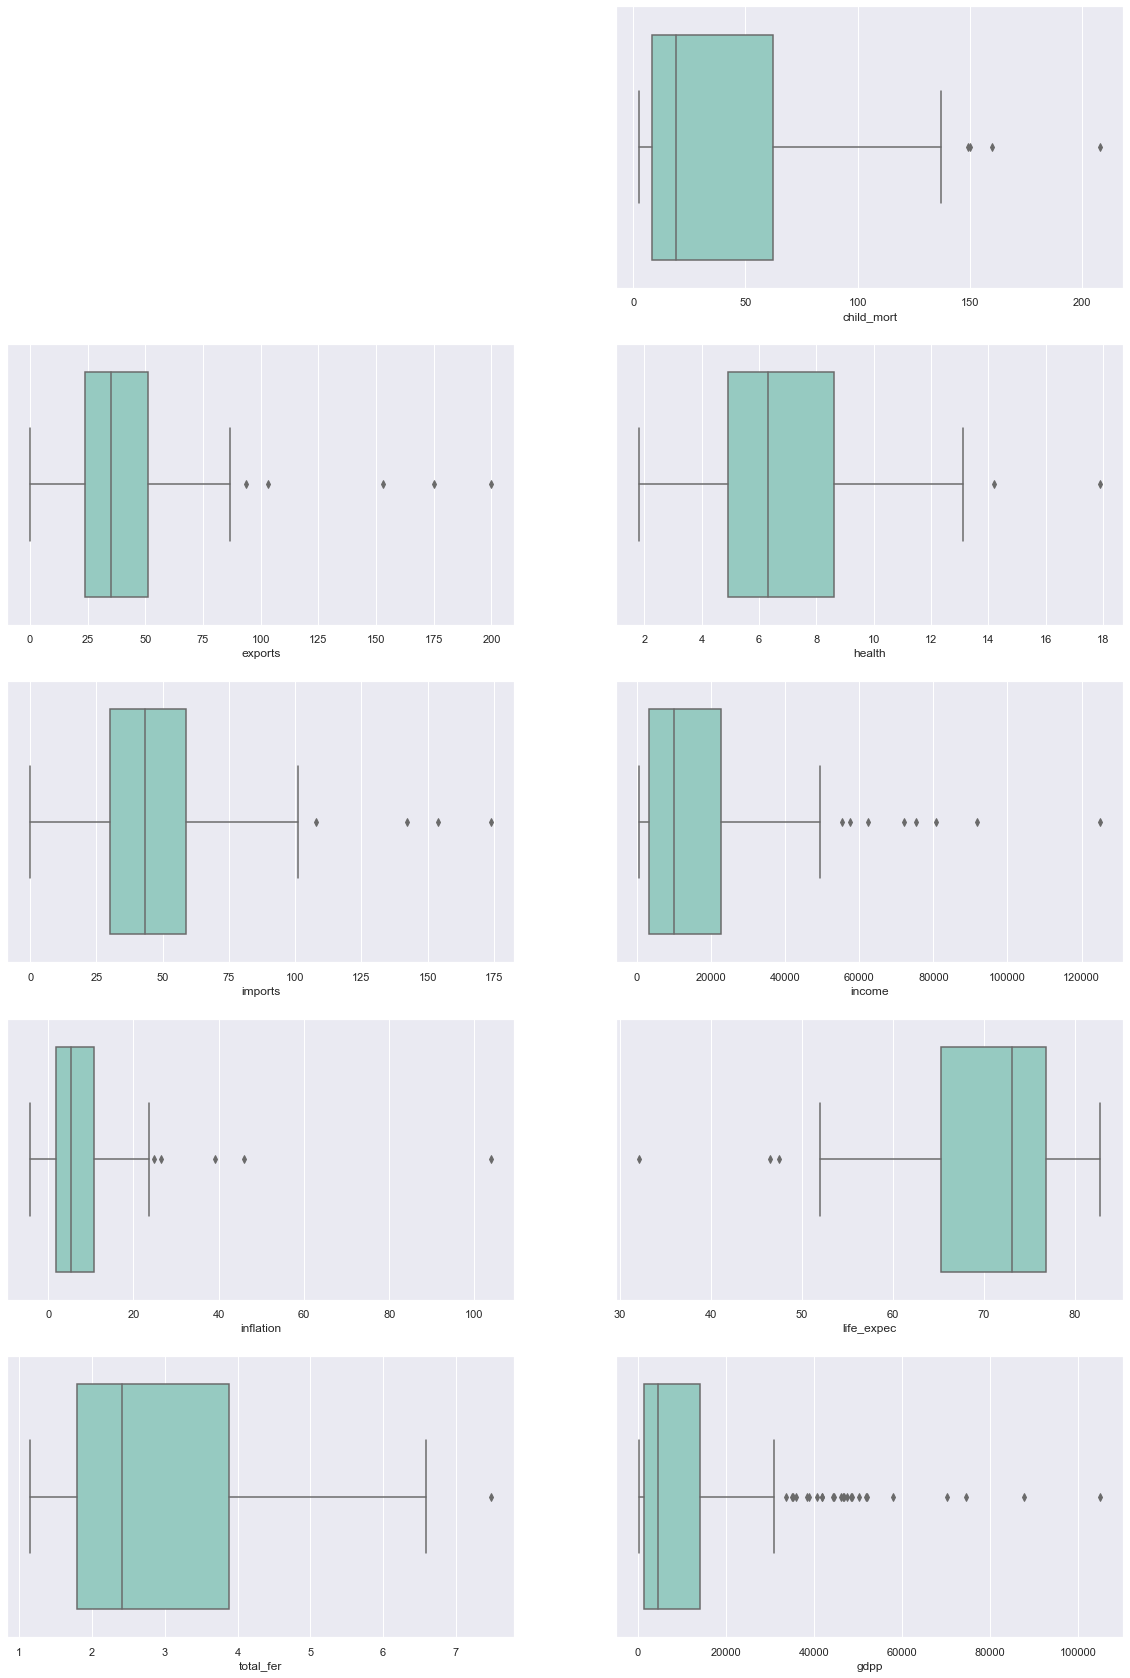

In [19]:
plt.figure(figsize = (20,30))

counter = 0

for i, col in enumerate(no_missing.columns):
    if no_missing[col].dtype == 'object':
        continue
    ax = plt.subplot(5, 2, i+1)
    sns.boxplot(x = col, data = no_missing, palette = "Set3")
    plt.xlabel(col)
    
plt.show()

**Note: There are many ouliears in the data, by dropping them can result in loss of data. So we will perform binning to handle them.**
    
Additionaly features are either in the scale of thousands, units or decimals. So we will make intervals accordingly.

In [20]:
# create the copy of dataframe
data = no_missing.copy()

In [21]:
# Iterate through column
for col in ['health', 'inflation']:
    interval = col + "_new"
    
    
    data[interval] = 0
    
    data.loc[((data[col] > 0) & (data[col] <= 4)), interval] = 1
    
    data.loc[((data[col] > 4) & (data[col] <= 5)), interval] = 2
    
    data.loc[((data[col] > 5) & (data[col] <= 6)), interval] = 3
    
    data.loc[((data[col] > 6) & (data[col] <= 9)), interval] = 4
    
    data.loc[((data[col] > 9) & (data[col] <=  11)), interval] = 5
    
    data.loc[data[col] > 11, interval] = 6

In [22]:
# Get features having scale as decimal
columns = ['exports', 'imports', 'child_mort']

# Iterate through each column
for col in columns:
    interval = col + "_new"
    
    data[interval] = 0
    
    data.loc[((data[col] > 0) & (data[col] <= 10)), interval] = 1
    
    data.loc[((data[col] > 10) & (data[col] <= 20)), interval] = 2
    
    data.loc[((data[col] > 20) & (data[col] <= 30)), interval] = 3
    
    data.loc[((data[col] > 30) & (data[col] <= 40)), interval] = 4
    
    data.loc[((data[col] > 40) & (data[col] <= 50)), interval] = 5
    
    data.loc[((data[col] > 50) & (data[col] <= 70)), interval] = 6
    
    data.loc[((data[col] > 70) & (data[col] <= 100)), interval] = 7

    data.loc[(data[col] > 100), interval] = 8

In [23]:
for col in ['total_fer']:
    interval  = col+'_new'
    
    data[interval] = 0
    
    data.loc[((data[col] > 0) & (data[col] <= 1.452)), interval] = 1
    
    data.loc[((data[col] > 1.452) & (data[col] <= 2.1)), interval] = 2
    
    data.loc[((data[col] > 2.1) & (data[col] <= 5)), interval] = 3
    
    data.loc[data[col] > 5, interval] = 4

In [24]:
for col in ['life_expec']:
    interval  = col+'_new'
    
    data[interval] = 0
    
    data.loc[((data[col] > 0) & (data[col] <= 57.82)), interval] = 1
    
    data.loc[((data[col] > 57.82) & (data[col] <= 61.88)), interval] = 2
    
    data.loc[((data[col] > 61.88) & (data[col] <= 70)), interval] = 3
    
    data.loc[((data[col] > 70) & (data[col] <= 74)), interval] = 4
    
    data.loc[((data[col] > 74) & (data[col] <= 78)), interval] = 5
    
    data.loc[data[col] > 78, interval] = 6

In [25]:
for col in ['income']:
    interval  = col+'_new'
    
    data[interval] = 0
    
    data.loc[((data[col] > 0) & (data[col] <= 1500)), interval] = 1
    
    data.loc[((data[col] > 1500) & (data[col] <= 2500)), interval] = 2
    
    data.loc[((data[col] > 2500) & (data[col] <= 5900)), interval] = 3
    
    data.loc[((data[col] > 5900) & (data[col] <= 10000)), interval] = 4
    
    data.loc[((data[col] > 10000) & (data[col] <= 16400)), interval] = 5
    
    data.loc[((data[col] > 16400) & (data[col] <= 36200)), interval] = 6
    
    data.loc[data[col] > 36200, interval] = 7

In [26]:
for col in ['gdpp']:
    interval  = col+'_new'
    
    data[interval] = 0
    
    data.loc[((data[col] > 0) & (data[col] <= 600)), interval] = 1
    
    data.loc[((data[col] > 600) & (data[col] <= 1100)), interval] = 2
    
    data.loc[((data[col] > 1100) & (data[col] <= 2910)), interval] = 3
    
    data.loc[((data[col] > 2910) & (data[col] <= 4660)), interval] = 4
    
    data.loc[((data[col] > 4660) & (data[col] <= 8965)), interval] = 5
    
    data.loc[((data[col] > 8965) & (data[col] <= 32250)), interval] = 6
    
    data.loc[data[col] > 32250, interval] = 7


In [27]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,health_new,inflation_new,exports_new,imports_new,child_mort_new,total_fer_new,life_expec_new,income_new,gdpp_new
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,4,5,1,5,7,4,1,2,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,4,2,3,5,2,2,5,4,4
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,6,4,4,3,3,5,5,4
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,6,6,5,8,4,2,3,4
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,4,1,5,6,2,3,5,6,6


In [28]:
# Drop previous features
data.drop(['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp'], axis = 1, inplace = True)

In [29]:
data.head()

,country,health_new,inflation_new,exports_new,imports_new,child_mort_new,total_fer_new,life_expec_new,income_new,gdpp_new
0,Afghanistan,4,5,1,5,7,4,1,2,1
1,Albania,4,2,3,5,2,2,5,4,4
2,Algeria,2,6,4,4,3,3,5,5,4
3,Angola,1,6,6,5,8,4,2,3,4
4,Antigua and Barbuda,4,1,5,6,2,3,5,6,6


### Correlation Analysis

In [30]:
# check correlation
corr = data.corr()
corr

,health_new,inflation_new,exports_new,imports_new,child_mort_new,total_fer_new,life_expec_new,income_new,gdpp_new
health_new,1.000000,-0.356243,-0.134771,0.111014,-0.255124,-0.296426,0.222662,0.153215,0.198460
inflation_new,-0.356243,1.000000,-0.150462,-0.310193,0.354503,0.368660,-0.355830,-0.261749,-0.312454
exports_new,-0.134771,-0.150462,1.000000,0.603002,-0.367575,-0.309220,0.297415,0.486547,0.465014
imports_new,0.111014,-0.310193,0.603002,1.000000,-0.144797,-0.158637,0.004410,0.008920,0.035438
child_mort_new,-0.255124,0.354503,-0.367575,-0.144797,1.000000,0.786094,-0.880746,-0.831112,-0.821112
total_fer_new,-0.296426,0.368660,-0.309220,-0.158637,0.786094,1.000000,-0.701810,-0.659943,-0.665142
life_expec_new,0.222662,-0.355830,0.297415,0.004410,-0.880746,-0.701810,1.000000,0.817028,0.809631
income_new,0.153215,-0.261749,0.486547,0.008920,-0.831112,-0.659943,0.817028,1.000000,0.959823
gdpp_new,0.198460,-0.312454,0.465014,0.035438,-0.821112,-0.665142,0.809631,0.959823,1.000000


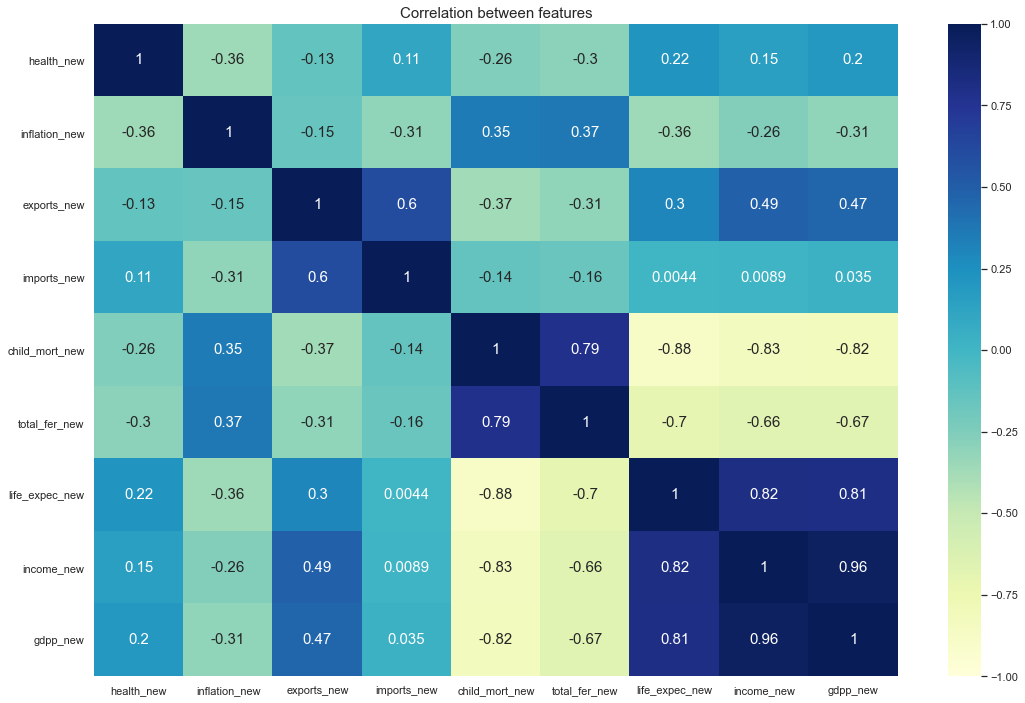

In [31]:
plt.figure(figsize = (18,12))

sns.heatmap(corr, annot=True, fmt='.2g', cmap='YlGnBu', vmax = 1.0, vmin = -1.0, annot_kws={"size": 15})

plt.title('Correlation between features', fontsize=15)

plt.show()

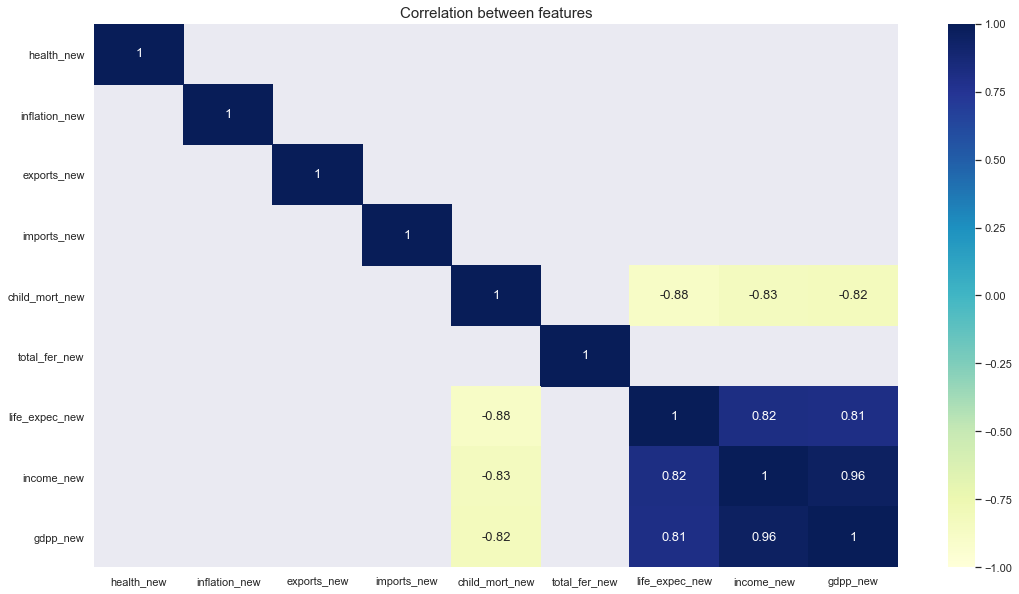

In [32]:
plt.figure(figsize = (18,10))

sns.heatmap(corr[(corr >= 0.8) | (corr <= -0.8)], annot=True, fmt='.2g', cmap='YlGnBu', 
            vmax = 1.0, vmin = -1.0, annot_kws={"size": 13})

plt.title('Correlation between features', fontsize=15)

plt.show()

**Note: We can observe ther is high corelation in life_expec_new, income_new, gdpp.**

This can be because if there is high income rate the standard of living get high and this can imporve life expectancy, where as gdpp is also dependent on income, exports and standard of leaving of it's country.

<hr style = "border: 1px solid gray"></hr>

| Type |	Number of Instances	| Number of Attributes |  Numeric Features	| Categorical Features	| Missing Values|
| :-: | :-: | :-: | :-: | :-: | :-: | 
| Unsupervised Learning | 167 | 10 | 9 |	1	| Null |

<hr style = "border: 1px solid gray"></hr>

In [33]:
data_1 = data.copy()

<a id = 'scaling'> </a>
# 4.3 - Feature Scaling


*Feature scaling is a method to normilize the range of independent data.*

**We are going to use StandardScaler to normilize data which brings data into range of -1 to 0 ot +1, where the method used Z score formula. StandardScaler convert data into Standard Normal Distrubution**

[goto toc](#toc)

In [34]:
# Importing ScandardScaler package
from sklearn.preprocessing import StandardScaler

In [35]:
# Initilize scaler
scaler = StandardScaler()

# fit the scaler
scaler.fit(data_1.drop('country', axis = 1))

# Transform the dataset
X = scaler.transform(data_1.drop('country', axis = 1))

In [36]:
X

array([[ 0.37874517,  0.93044351, -1.83126848, ..., -1.83065411,
        -1.22673054, -1.74322235],
       [ 0.37874517, -0.46941294, -0.68800928, ...,  0.65486814,
        -0.17614592, -0.1780711 ],
       [-0.99626446,  1.39706233, -0.11637968, ...,  0.65486814,
         0.34914638, -0.1780711 ],
       ...,
       [ 0.37874517,  1.39706233,  1.59850912, ...,  0.03348758,
        -0.70143823, -0.69978818],
       [-0.30875965,  1.39706233, -0.68800928, ..., -0.58789299,
        -0.70143823, -0.69978818],
       [-0.30875965,  1.39706233, -0.11637968, ..., -1.83065411,
        -0.70143823, -0.69978818]])

<a id='model_development'></a>
### 5. Model Development

[...goto toc](#toc)

Since our project we are focusing on to suggest the countries which the CEO needs to focus on the most, this decision making falls under **Unsupervised Machine Learning** use case.

For our project we will focus on implementing it via **KMeans**.
 
We will use **Elbow Method** to determine the optimal value of K in K-Means Clustering. It consist of ploting the values of function of number of clusters and picking the elbod of the curved of the plot values curve as the number of clusters to use.

In [51]:
# Import required packages
from sklearn.cluster import KMeans

In [52]:
def clustering_Data(data, min_cluster = 2, max_cluster = 10, random_state = 1):
    
    elbow_values = []
    
    for cluster in range(min_cluster, max_cluster):
        # Initialize KMeans with number of clusters
        kmeans = KMeans(n_clusters = cluster)
        
        # fit the data
        kmeans.fit(data)

        # Calculate Inertia for Elbow Method
        elbow_values.append(kmeans.inertia_)
        
    return elbow_values

In [53]:
# Function to plot metric scores to find optimal value of 'K'
def plot_metrics(elbow_values, min_cluster = 2, max_cluster = 10):
    
    plt.figure(figsize = (10, 8))
    x_axis = list(range(min_cluster, max_cluster))
    
    # Plot Inertia for Elbow Method
    sns.lineplot(x = x_axis, y = elbow_values)
    plt.title('Elbow Method', fontsize = 15)
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")

In [54]:
elbow_values = clustering_Data(X, min_cluster = 2, max_cluster = 10, random_state = 5)

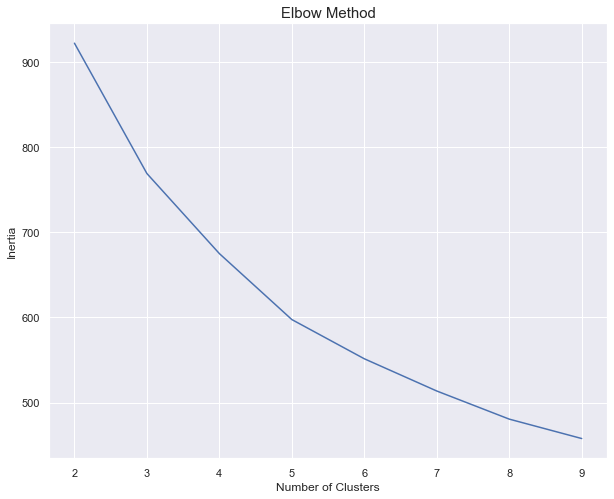

In [55]:
plot_metrics(elbow_values, min_cluster = 2, max_cluster = 10)

From analyzing different metrics we considered optimal value of **K as 5**

In [56]:
# Initialize KMeans with number of clusters
kmeans = KMeans(n_clusters = 5)

# Fit on data
kmeans.fit(X)

# Get labels assigned for the dataset
labels = kmeans.labels_

In [57]:
# Create copy of the dataframe
clusters = data_1.copy(deep = True) 

# Assign clusters to customers
clusters['Cluster'] = labels

# Print cluster dataframe
clusters.head()

,country,health_new,inflation_new,exports_new,imports_new,child_mort_new,total_fer_new,life_expec_new,income_new,gdpp_new,Cluster
0,Afghanistan,4,5,1,5,7,4,1,2,1,1
1,Albania,4,2,3,5,2,2,5,4,4,2
2,Algeria,2,6,4,4,3,3,5,5,4,0
3,Angola,1,6,6,5,8,4,2,3,4,1
4,Antigua and Barbuda,4,1,5,6,2,3,5,6,6,3


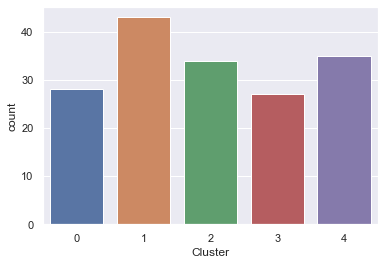

In [58]:
# Get distribution of clusters
sns.countplot(x = "Cluster", data = clusters)
plt.show()

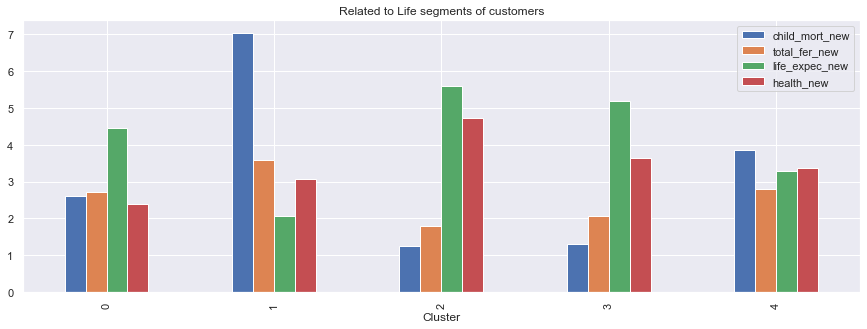

In [59]:
# Explore features with respect to clusters
(clusters[['child_mort_new', 'total_fer_new', 'life_expec_new', 'health_new' , 'Cluster']]
 .groupby('Cluster').mean().plot.bar(figsize=(15, 5)))
plt.title('Related to Life segments of customers')
plt.show()

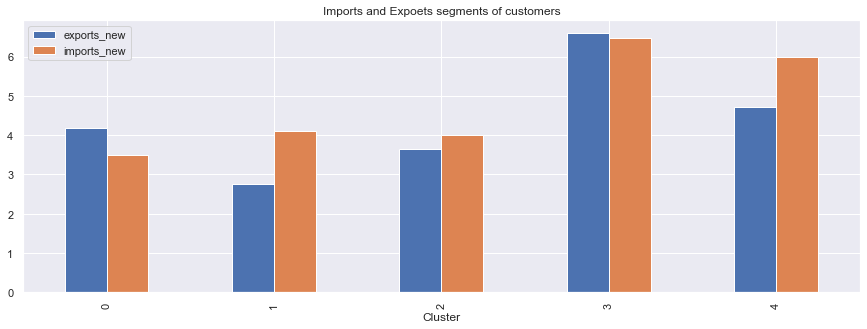

In [60]:
# Explore features with respect to clusters
(clusters[['exports_new', 'imports_new', 'Cluster']]
 .groupby('Cluster').mean().plot.bar(figsize=(15, 5)))
plt.title('Imports and Expoets segments of customers')
plt.show()

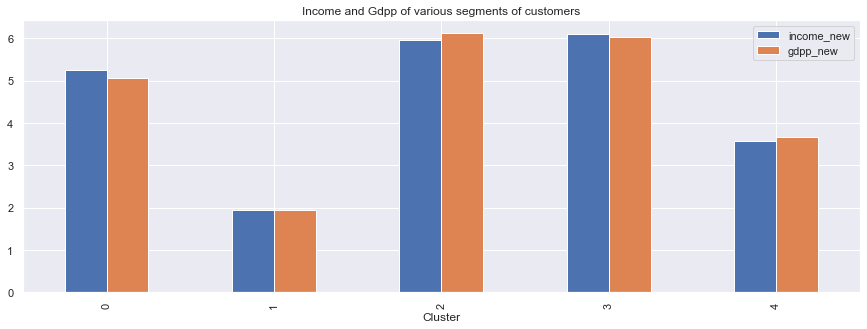

In [65]:
# Explore features with respect to clusters
(clusters[['income_new', 'gdpp_new' , 'Cluster']]
 .groupby('Cluster').mean().plot.bar(figsize=(15, 5)))
plt.title('Income and Gdpp of various segments of customers')
plt.show()

### Visualize clusters using PCA


In [62]:
# Import relevant functions to perform pca
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity


# Initialize PCA object 
# we will reduce dimensions to '2' 
pca = PCA(2)

# fit on data
pca.fit(X)

# transform the data into 2-Dimensional
X_PCA = pca.transform(X)

X_PCA.shape

(167, 2)

In [63]:
import os

# Make output directory
output_path = os.getcwd() + "\\output"

# Check if directory exist if not then create it
if not os.path.isdir(output_path):
    os.mkdir(output_path)

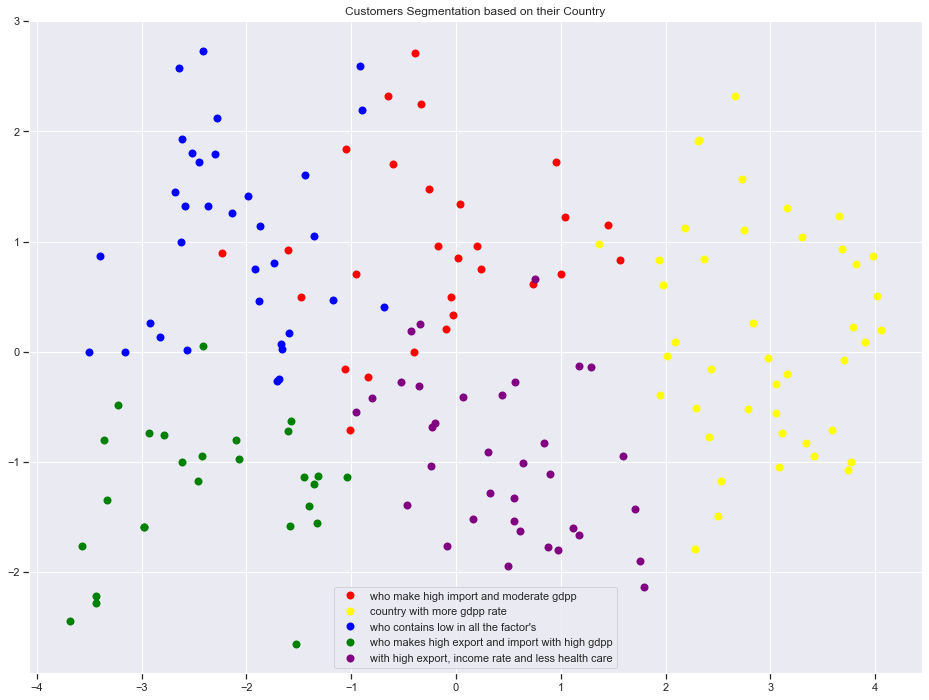

In [64]:
# Assign different colors for each cluster
colors = {0 : 'red',
         1 : 'yellow',
         2 : 'blue',
         3 : 'green',
         4 : 'purple'
        }


# Assign names of clusters
names = {0: 'who make high import and moderate gdpp', 
         1: 'country with more gdpp rate', 
         2: "who contains low in all the factor's", 
         3:'who makes high export and import with high gdpp',
         4: 'with high export, income rate and less health care'
         }

x, y = X_PCA[:,0], X_PCA[:,1]

dataframe = pd.DataFrame({'x': x, 'y':y, 'label':labels})

# Group with respect to clusters
groups = dataframe.groupby('label')

# Plot cluster
fig, ax = plt.subplots(figsize=(16, 12)) 

for name, group in groups:
    plt.plot(group.x, group.y, marker='o', linestyle='', ms=8, color=colors[name], label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis = 'x', which='both', bottom='off')
    ax.tick_params(axis = 'y', which='both', left='off')
     
# add legend
ax.legend()

# add title
ax.set_title("Customers Segmentation based on their Country")


# Save cluster plot
plt.savefig(output_path + "\\cluster.png")

# show the plot
plt.show()

<hr style = 'border : .5px solid'></hr>

**Countries which CEO should share out funds**

- **Cluster 1 :** This group of Countries lies in low for all the factors represented in the dataset features, CEO Should focus on this countries, as he must raise 70% of money. In Addition, CEO should encourage them to generate increase in health care system, high exports and moderate import which can increase income, lifestyle, gdpp and decrease child mort rate. 
- **Cluster 4 :** 25% should be distributed to this country, to encourage them increase in healthcare system and exports. 
- **Cluster 0 :** With small-scale healthcare system 1-5% should be alloted to this countries. 

**Countries which CEO should not share out funds** 
- **Cluster 2 :** This country should center of attention towards increase in exports and decrese in imports which will sharp there gdpp.
- **Cluster 3 :** There is similar discription as Cluster 2 Country, but this countries should focus more towards increase in gdpp.